In [422]:
import os 
results_path = os.path.join(os.getcwd(), "results")
paths = [os.path.join(results_path, x) for x in os.listdir(results_path)]
paths

['/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr_dsprites_model_cnn_rep_1',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_none_dsprites_model_cnn_rep_2',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_sup_dsprites_model_cnn_rep_2',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_none_dsprites_model_cnn_rep_3',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr_dsprites_model_cnn_rep_0',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_geom_dsprites_model_mlp_rep_0',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr3_dsprites_model_cnn_rep_0',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr3_dsprites_model_cnn_rep_1',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_geom_crop_dsprites_model_mlp_rep_0',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr2_dsprites_model_cnn_rep_0',
 '/Users/miguelmartins/

In [423]:
import re
import pandas as pd

import re
import pandas as pd
def parse_logs(log_path):
    
    with open(log_path, "r") as f:
        text = f.read()
    
    # Regexes for the lines we care about
    coord_re = re.compile(r"^Coordinate\s+(\d+)\s+(\w+)\s+([-\d\.eE+]+)")
    val_re   = re.compile(r"^val\s+Epoch\s+(\d+)\s+Loss\s+([-\d\.eE+]+)\s+val_acc\s+([-\d\.eE+]+)")
    adv_re   = re.compile(r"^adv\s+Epoch\s+(\d+)\s+Loss\s+([-\d\.eE+]+)\s+adv_acc\s+([-\d\.eE+]+)")
    
    rows_val = []
    rows_adv = []
    coords = {}   # holds shape/scale/orientation/posX/posY before each val/adv line
    
    for line in text.splitlines():
        line = line.strip()
        if not line:
            continue
    
        # Coordinate lines
        m = coord_re.match(line)
        if m:
            idx, name, value = m.groups()
            coords[name] = float(value)
            continue
    
        # Validation block
        m = val_re.match(line)
        if m:
            epoch, loss, acc = m.groups()
            row = {
                "epoch": int(epoch),
                "loss": float(loss),
                "val_acc": float(acc),
            }
            row.update(coords)        # add shape/scale/orientation/posX/posY
            rows_val.append(row)
            coords = {}               # reset for next block
            continue
    
        # Adversarial block
        m = adv_re.match(line)
        if m:
            epoch, loss, acc = m.groups()
            row = {
                "epoch": int(epoch),
                "loss": float(loss),
                "adv_acc": float(acc),
            }
            row.update(coords)
            rows_adv.append(row)
            coords = {}
            continue
    
    # Build the two DataFrames
    df_val = pd.DataFrame(rows_val)
    df_adv = pd.DataFrame(rows_adv)
    
    return df_val, df_adv


In [424]:
dir_ = '/Users/miguelmartins/Projects/csi-robustness/results/diet_aug_none_dsprites_model_cnn_rep_0'
log_path = os.path.join(dir_, "log_probe.txt")   # <-- change if needed

df_val, df_adv = parse_logs(log_path)

In [425]:
df_val, df_adv

(    epoch      loss   val_acc     shape     scale  orientation      posX  \
 0       0  1.096845  0.410301  0.248573  0.409093     0.069672  0.385228   
 1      10  1.043096  0.451678  0.248573  0.409093     0.069672  0.385228   
 2      20  1.042828  0.452488  0.248573  0.409093     0.069672  0.385228   
 3      30  1.042583  0.450941  0.248573  0.409093     0.069672  0.385228   
 4      40  1.042967  0.450204  0.248573  0.409093     0.069672  0.385228   
 5      50  1.042470  0.451176  0.248573  0.409093     0.069672  0.385228   
 6      60  1.042568  0.452501  0.248573  0.409093     0.069672  0.385228   
 7      70  1.042664  0.450702  0.248573  0.409093     0.069672  0.385228   
 8      80  1.042678  0.452908  0.248573  0.409093     0.069672  0.385228   
 9      90  1.042466  0.451728  0.248573  0.409093     0.069672  0.385228   
 10    100  0.000000  0.453328  0.248573  0.409093     0.069672  0.385228   
 
         posY  
 0   0.405144  
 1   0.405144  
 2   0.405144  
 3   0.405

In [426]:
paths

['/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr_dsprites_model_cnn_rep_1',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_none_dsprites_model_cnn_rep_2',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_sup_dsprites_model_cnn_rep_2',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_none_dsprites_model_cnn_rep_3',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr_dsprites_model_cnn_rep_0',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_geom_dsprites_model_mlp_rep_0',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr3_dsprites_model_cnn_rep_0',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr3_dsprites_model_cnn_rep_1',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_geom_crop_dsprites_model_mlp_rep_0',
 '/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr2_dsprites_model_cnn_rep_0',
 '/Users/miguelmartins/

In [427]:
# augs = ["none", "crop", "sup", "simclr", "simclr2", "simclr3"]
augs = ["crop", "sup", "simclr", "simclr2", "simclr3"]
perm = [
    f"diet_aug_{aug}_dsprites_model_cnn_rep_" for aug in augs 
]
plot_dict = {}
for p in perm:
    select_path = [path for path in paths if p in path] 
    log_vals = []
    for i in range(len(select_path)):
        log_path = os.path.join(select_path[i], "log_probe.txt")   # <-- change if needed
        try:
            df_val, df_adv = parse_logs(log_path)
            log_vals.append([df_val, df_adv])
            print(select_path[i])
            print(len(log_vals))
        except:
            continue
        
    print()
    plot_dict[p] = log_vals


/Users/miguelmartins/projects/csi-robustness/results/diet_aug_crop_dsprites_model_cnn_rep_2
1
/Users/miguelmartins/projects/csi-robustness/results/diet_aug_crop_dsprites_model_cnn_rep_1
2
/Users/miguelmartins/projects/csi-robustness/results/diet_aug_crop_dsprites_model_cnn_rep_0
3

/Users/miguelmartins/projects/csi-robustness/results/diet_aug_sup_dsprites_model_cnn_rep_2
1
/Users/miguelmartins/projects/csi-robustness/results/diet_aug_sup_dsprites_model_cnn_rep_1
2
/Users/miguelmartins/projects/csi-robustness/results/diet_aug_sup_dsprites_model_cnn_rep_0
3

/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr_dsprites_model_cnn_rep_1
1
/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr_dsprites_model_cnn_rep_0
2
/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr_dsprites_model_cnn_rep_2
3

/Users/miguelmartins/projects/csi-robustness/results/diet_aug_simclr2_dsprites_model_cnn_rep_0
1
/Users/miguelmartins/projects/csi-robustness/result

In [428]:
len(plot_dict['diet_aug_crop_dsprites_model_cnn_rep_'])

3

In [429]:
import numpy as np
best_val_dict = {}
for experiment in plot_dict.keys():
    runs = []
    for run in range(len(plot_dict[experiment])):
        [val, adv] = plot_dict[experiment][run]
        try:
            best_val_idx = np.argmax(val['val_acc'])
        except:
            print(f"weekness {experiment}")
            continue
        row_val = val.iloc[best_val_idx]
        row_adv = adv.iloc[best_val_idx]
        row_val.rename(index={"val_acc": "acc"}, inplace=True)
        row_adv.rename(index={"adv_acc": "acc"}, inplace=True)

        runs.append([row_val, row_adv])
  
    best_val_dict[experiment] = runs
    


weekness diet_aug_simclr_dsprites_model_cnn_rep_


/var/folders/hn/v81yb_vd3899ls9424rlwq380000gn/T/ipykernel_70225/2320290994.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_val.rename(index={"val_acc": "acc"}, inplace=True)
/var/folders/hn/v81yb_vd3899ls9424rlwq380000gn/T/ipykernel_70225/2320290994.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_adv.rename(index={"adv_acc": "acc"}, inplace=True)


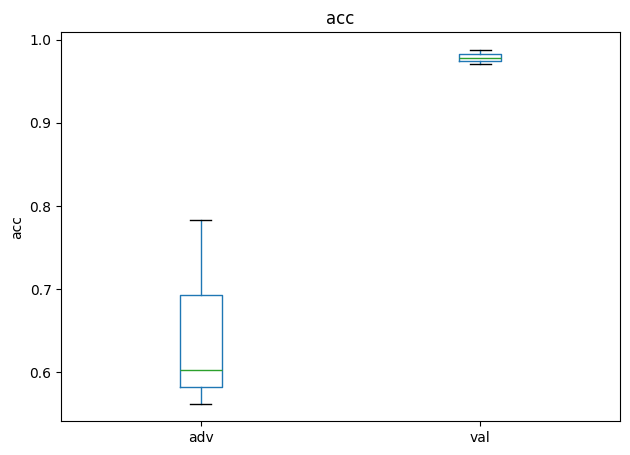

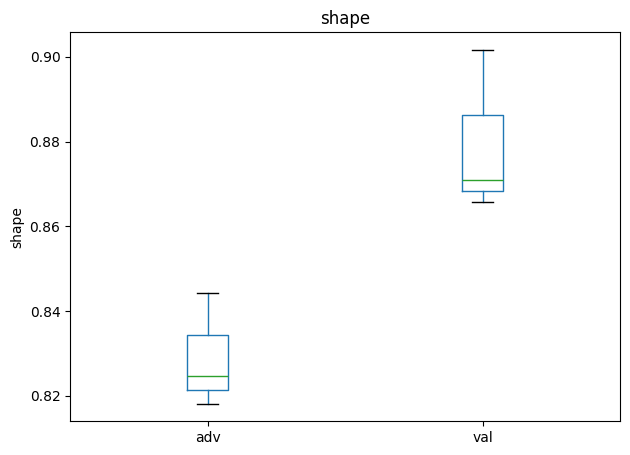

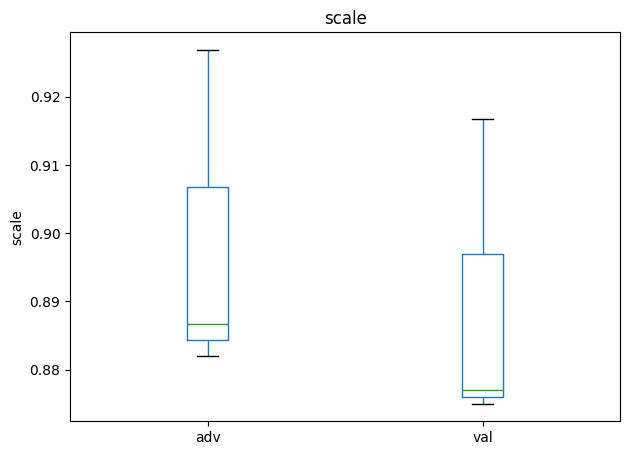

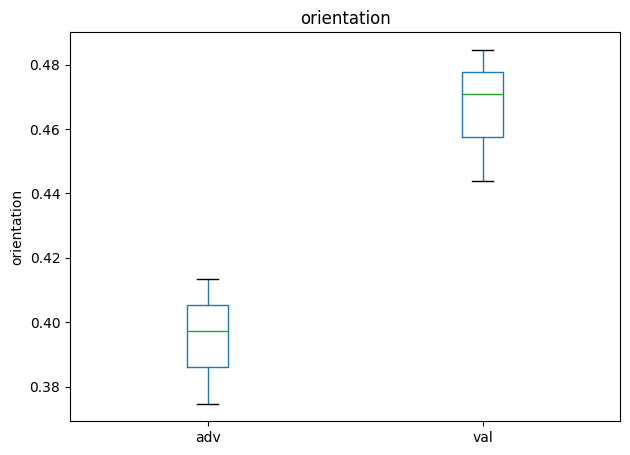

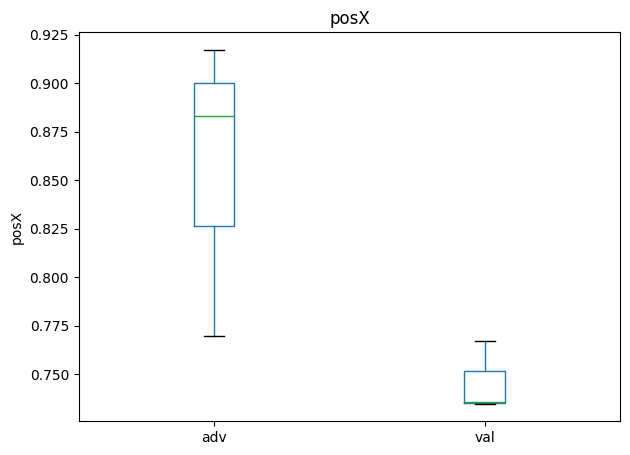

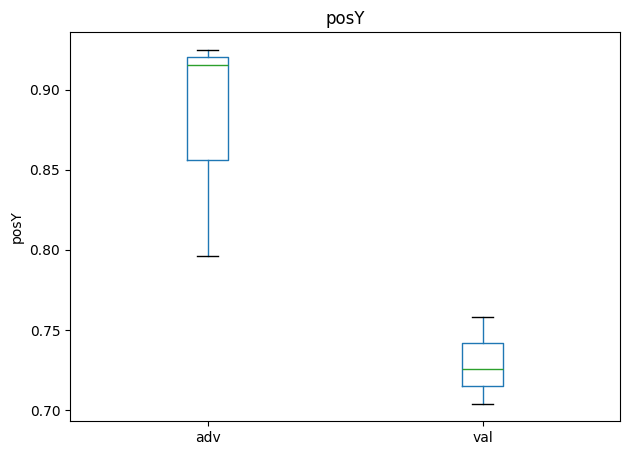

In [430]:
import pandas as pd
import matplotlib.pyplot as plt

# your object
L = best_val_dict['diet_aug_crop_dsprites_model_cnn_rep_']  # list of [val_series, adv_series]

metrics = ['acc', 'shape', 'scale', 'orientation', 'posX', 'posY']

# ---- build tidy dataframe: one row per (run, condition), one column per metric ----
rows = []
for run_idx, (s_val, s_adv) in enumerate(L, start=1):
    # normalize names: val series has val_acc, adv series has adv_acc
    r_val = {'run': run_idx, 'condition': 'val', **{k: s_val.get(k, pd.NA) for k in metrics}}
    r_adv = {'run': run_idx, 'condition': 'adv', **{k: s_adv.get(k, pd.NA) for k in metrics}}
    rows += [r_val, r_adv]

df = pd.DataFrame(rows)

# ---- boxplot per metric (val vs adv in same plot) ----
for m in metrics:
    # skip completely-missing columns
    if df[m].isna().all():
        continue

    ax = df.boxplot(column=m, by='condition', grid=False)
    ax.set_title(m)
    ax.set_xlabel('')
    ax.set_ylabel(m)
    plt.suptitle('')  # removes the automatic "by condition" super-title
    plt.tight_layout()
    plt.show()


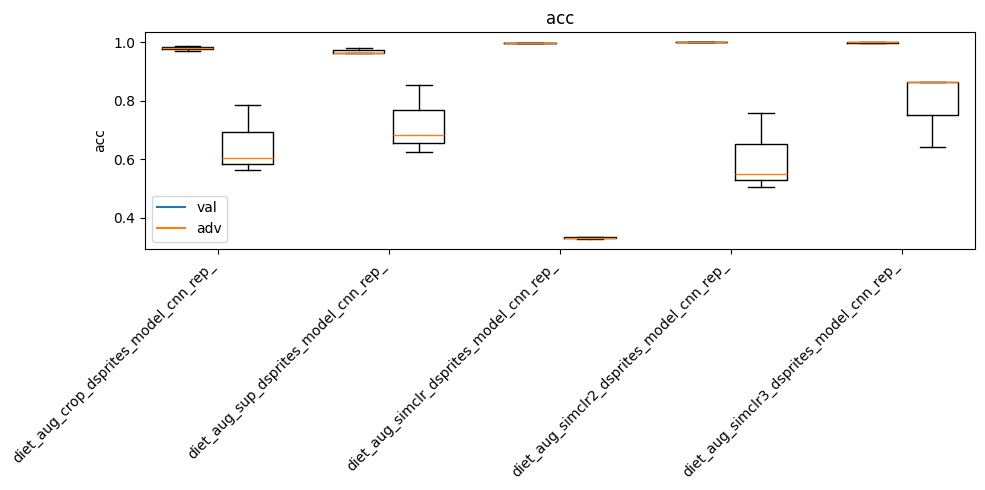

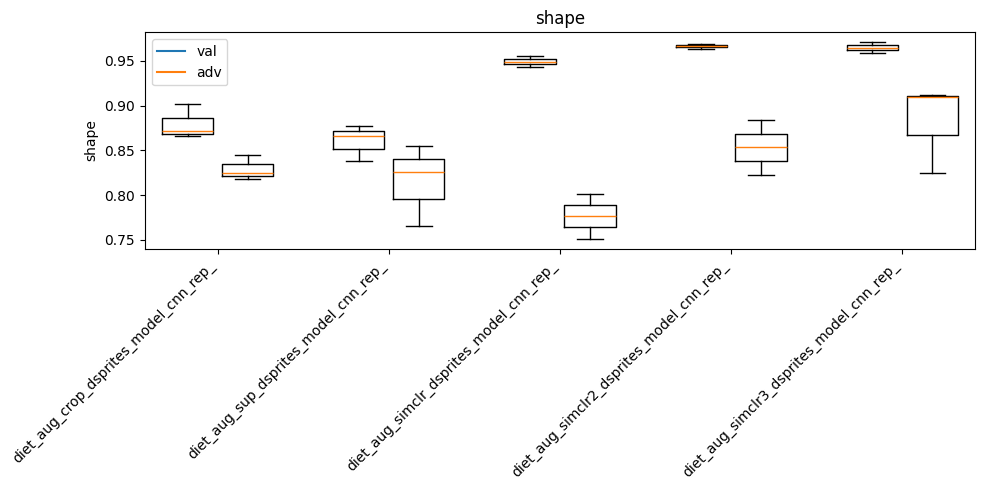

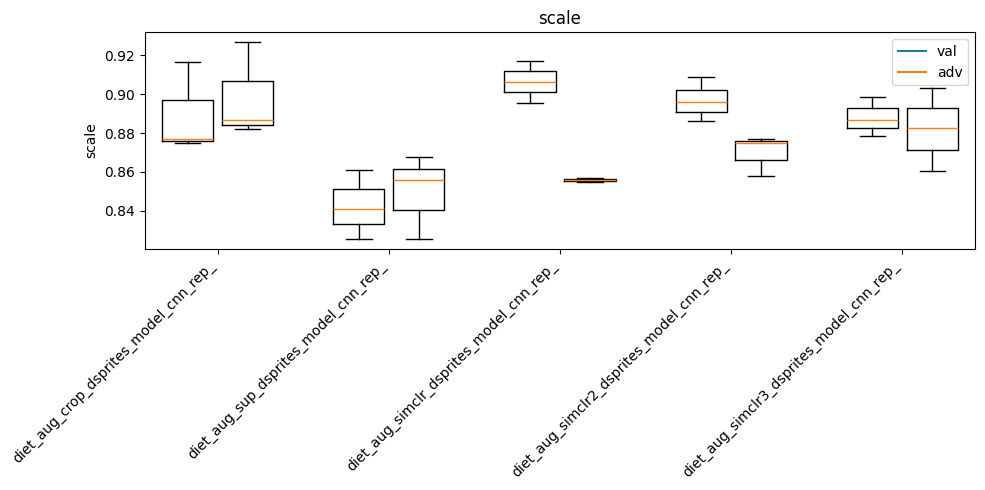

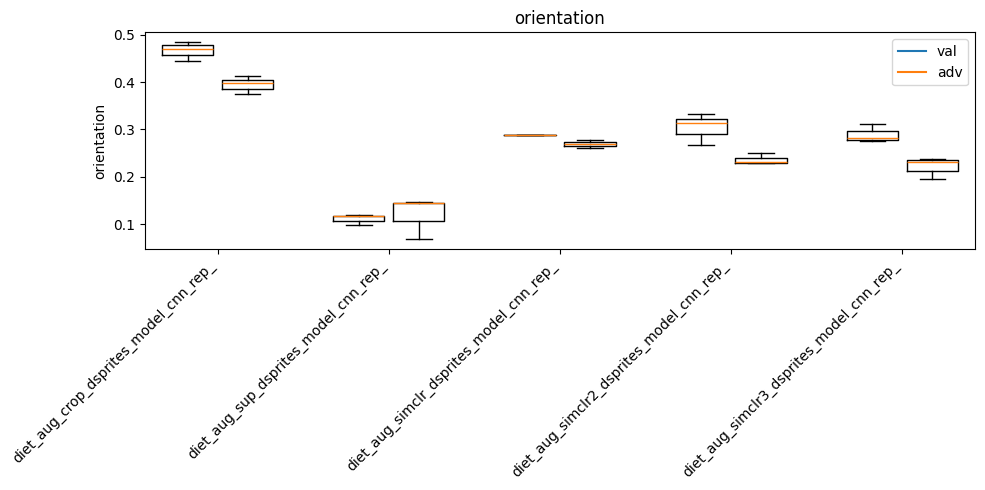

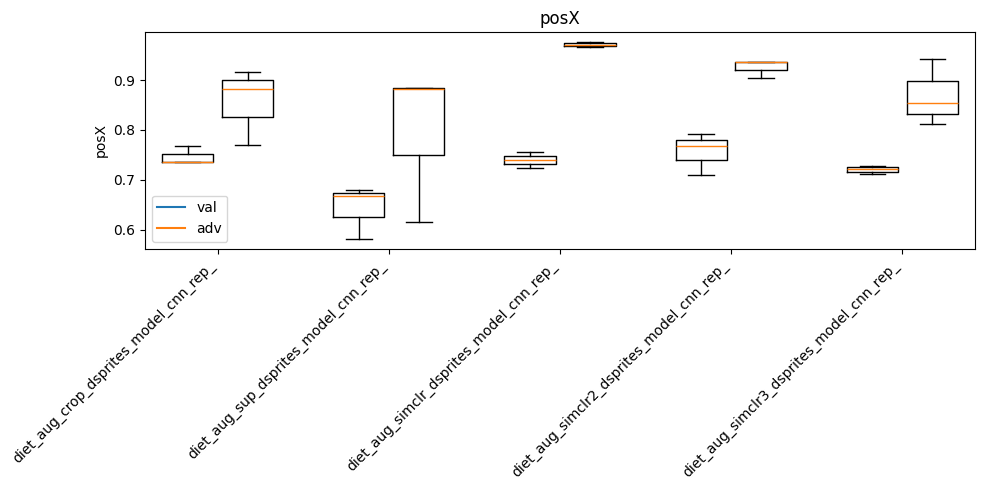

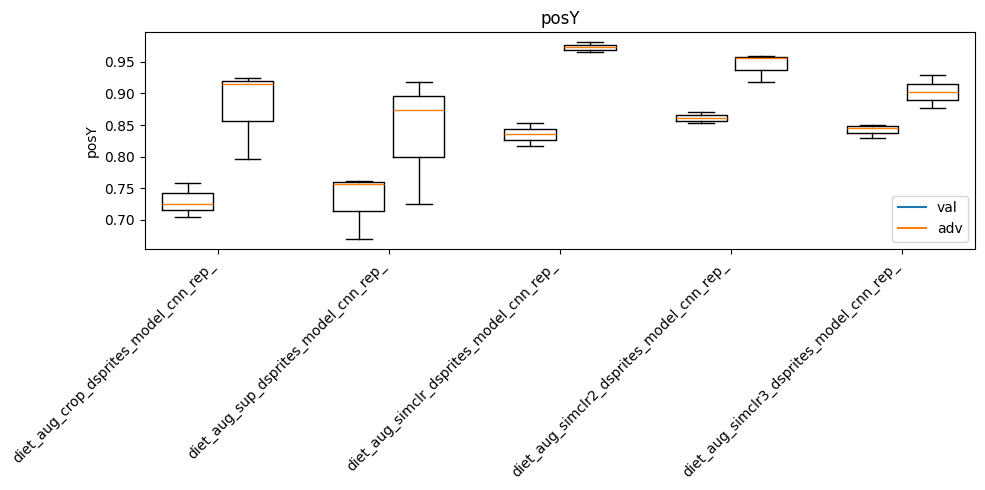

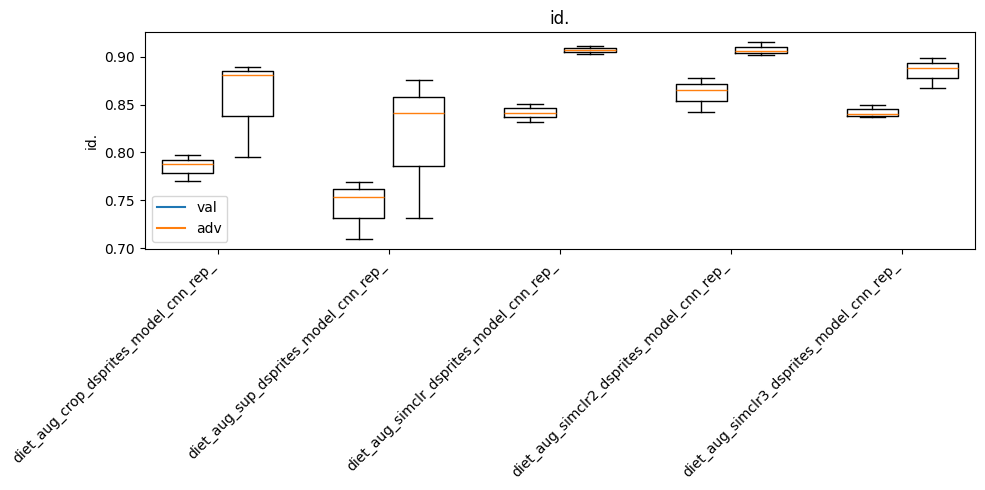

In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_metrics = ['acc', 'shape', 'scale', 'orientation', 'posX', 'posY']
metrics = base_metrics + ['id.']  # new derived metric

exp_keys = list(best_val_dict.keys())
all_medians = []

def get_metric_value(series, metric):
    """Return numeric value for metric (including derived 'id.')."""
    if metric != "id.":
        return series.get(metric, pd.NA)

    # id. = mean(shape, posX, posY) with NA-safe behavior
    parts = pd.to_numeric(
        pd.Series([series.get('shape', pd.NA), series.get('posX', pd.NA), series.get('posY', pd.NA)]),
        errors="coerce"
    )
    return parts.mean(skipna=True)  # if all missing -> NaN

for m in metrics:
    val_data, adv_data, used_keys = [], [], []

    for k in exp_keys:
        L = best_val_dict[k]

        v = [get_metric_value(s_val, m) for (s_val, s_adv) in L]
        a = [get_metric_value(s_adv, m) for (s_val, s_adv) in L]

        v = pd.to_numeric(pd.Series(v), errors="coerce").dropna().to_list()
        a = pd.to_numeric(pd.Series(a), errors="coerce").dropna().to_list()

        if len(v) == 0 and len(a) == 0:
            continue

        val_data.append(v)
        adv_data.append(a)
        used_keys.append(k)

    if not used_keys:
        continue

    n = len(used_keys)
    centers = np.arange(n) * 2.0
    pos_val = centers - 0.35
    pos_adv = centers + 0.35

    fig, ax = plt.subplots(figsize=(max(10, 0.6 * n), 5))

    bp_val = ax.boxplot(val_data, positions=pos_val, widths=0.6)
    bp_adv = ax.boxplot(adv_data, positions=pos_adv, widths=0.6)

    # extract medians
    med_val = [line.get_ydata()[0] for line in bp_val["medians"]]
    med_adv = [line.get_ydata()[0] for line in bp_adv["medians"]]

    for k, mv, ma in zip(used_keys, med_val, med_adv):
        all_medians.append({
            "metric": m,
            "experiment": k,
            "median_val": mv,
            "median_adv": ma,
        })

    ax.set_title(m)
    ax.set_ylabel(m)
    ax.set_xticks(centers)
    ax.set_xticklabels(used_keys, rotation=45, ha="right")
    ax.plot([], [], label="val")
    ax.plot([], [], label="adv")
    ax.legend()
    plt.tight_layout()
    plt.show()

medians_df = pd.DataFrame(all_medians)
medians_df

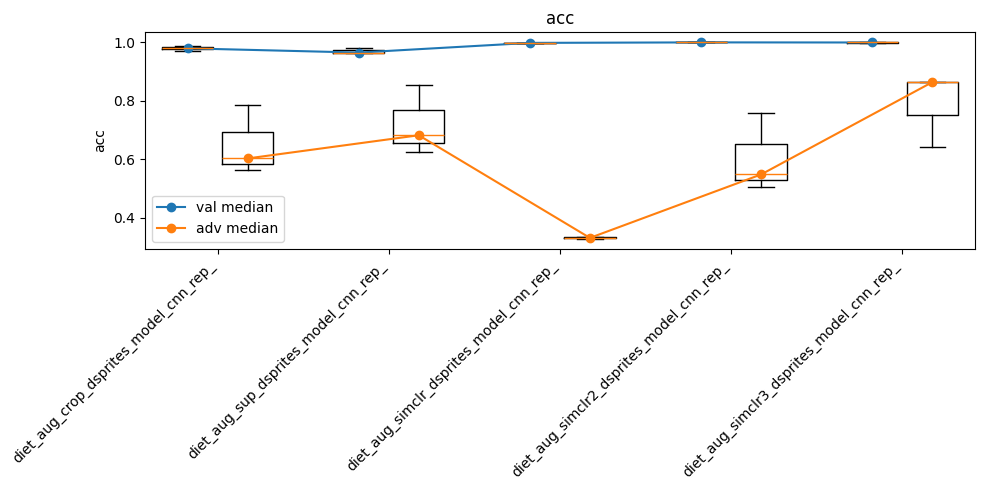

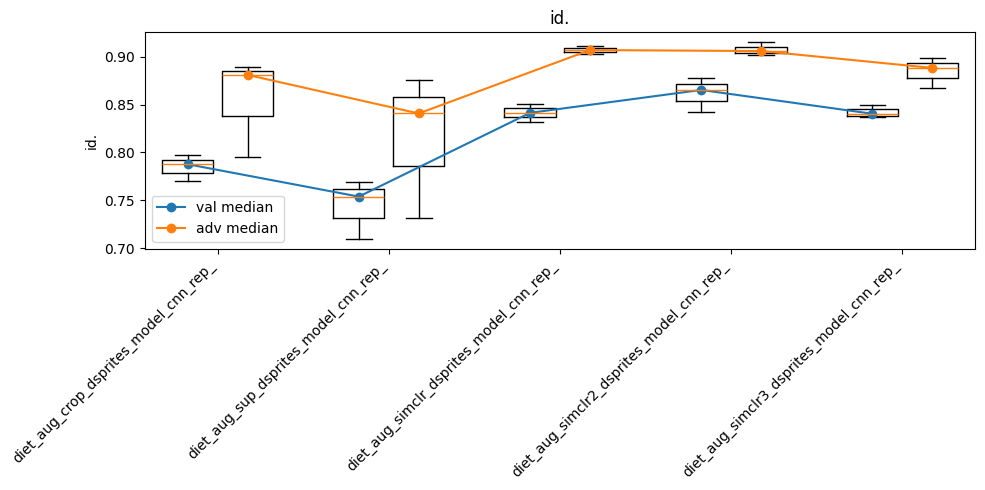

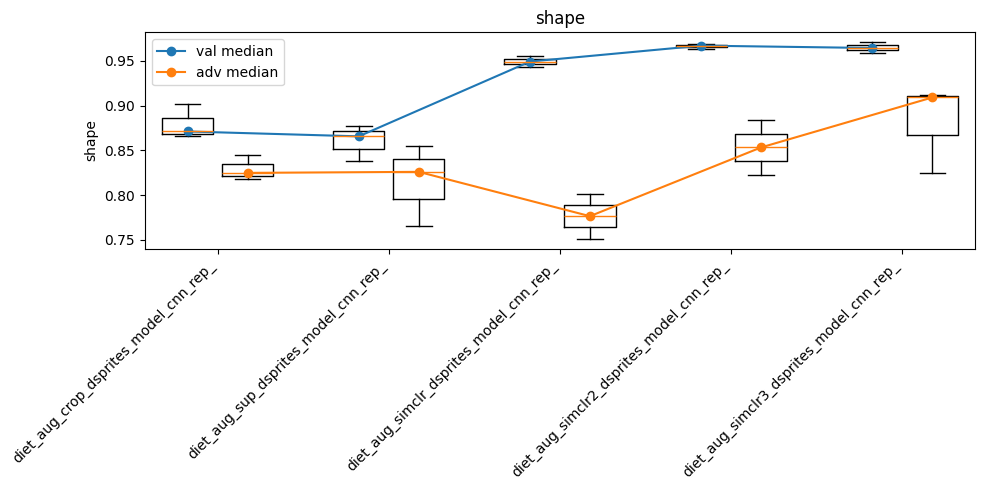

,metric,experiment,median_val,median_adv
0,acc,diet_aug_crop_dsprites_model_cnn_rep_,0.978692,0.602345
1,acc,diet_aug_sup_dsprites_model_cnn_rep_,0.964238,0.681600
2,acc,diet_aug_simclr_dsprites_model_cnn_rep_,0.997328,0.330833
3,acc,diet_aug_simclr2_dsprites_model_cnn_rep_,0.999055,0.547716
4,acc,diet_aug_simclr3_dsprites_model_cnn_rep_,0.998689,0.863195
5,id.,diet_aug_crop_dsprites_model_cnn_rep_,0.787628,0.880988
6,id.,diet_aug_sup_dsprites_model_cnn_rep_,0.753770,0.840688
7,id.,diet_aug_simclr_dsprites_model_cnn_rep_,0.841307,0.906958
8,id.,diet_aug_simclr2_dsprites_model_cnn_rep_,0.865264,0.905923
9,id.,diet_aug_simclr3_dsprites_model_cnn_rep_,0.840350,0.888283


In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Options
metrics_to_plot = ['acc', 'id.', 'shape']
connect_medians = True   # <- toggle this

exp_keys = list(best_val_dict.keys())
all_medians = []

def get_metric_value(series, metric):
    if metric != "id.":
        return series.get(metric, pd.NA)

    parts = pd.to_numeric(
        pd.Series([series.get('shape', pd.NA), series.get('posX', pd.NA), series.get('posY', pd.NA)]),
        errors="coerce"
    )
    return parts.mean(skipna=True)

for m in metrics_to_plot:
    val_data, adv_data, used_keys = [], [], []

    for k in exp_keys:
        L = best_val_dict[k]

        v = [get_metric_value(s_val, m) for (s_val, s_adv) in L]
        a = [get_metric_value(s_adv, m) for (s_val, s_adv) in L]

        v = pd.to_numeric(pd.Series(v), errors="coerce").dropna().to_list()
        a = pd.to_numeric(pd.Series(a), errors="coerce").dropna().to_list()

        if len(v) == 0 and len(a) == 0:
            continue

        val_data.append(v)
        adv_data.append(a)
        used_keys.append(k)

    if not used_keys:
        continue

    n = len(used_keys)
    centers = np.arange(n) * 2.0
    pos_val = centers - 0.35
    pos_adv = centers + 0.35

    fig, ax = plt.subplots(figsize=(max(10, 0.6 * n), 5))

    bp_val = ax.boxplot(val_data, positions=pos_val, widths=0.6)
    bp_adv = ax.boxplot(adv_data, positions=pos_adv, widths=0.6)

    # extract medians
    med_val = [line.get_ydata()[0] for line in bp_val["medians"]]
    med_adv = [line.get_ydata()[0] for line in bp_adv["medians"]]

    # optional median-connector lines
    if connect_medians:
        ax.plot(pos_val, med_val, marker='o', linestyle='-', label='val median')
        ax.plot(pos_adv, med_adv, marker='o', linestyle='-', label='adv median')

    # collect medians into a dataframe-friendly structure
    for k, mv, ma in zip(used_keys, med_val, med_adv):
        all_medians.append({
            "metric": m,
            "experiment": k,
            "median_val": mv,
            "median_adv": ma,
        })

    ax.set_title(m)
    ax.set_ylabel(m)
    ax.set_xticks(centers)
    ax.set_xticklabels(used_keys, rotation=45, ha="right")

    # If connect_medians=False, keep a simple legend
    if not connect_medians:
        ax.plot([], [], label="val")
        ax.plot([], [], label="adv")

    ax.legend()
    plt.tight_layout()
    plt.show()

medians_df = pd.DataFrame(all_medians)
medians_df

In [435]:
import pandas as pd

# wide tables: rows=experiment, cols=metric
wide_val = medians_df.pivot(index="experiment", columns="metric", values="median_val")
wide_adv = medians_df.pivot(index="experiment", columns="metric", values="median_adv")


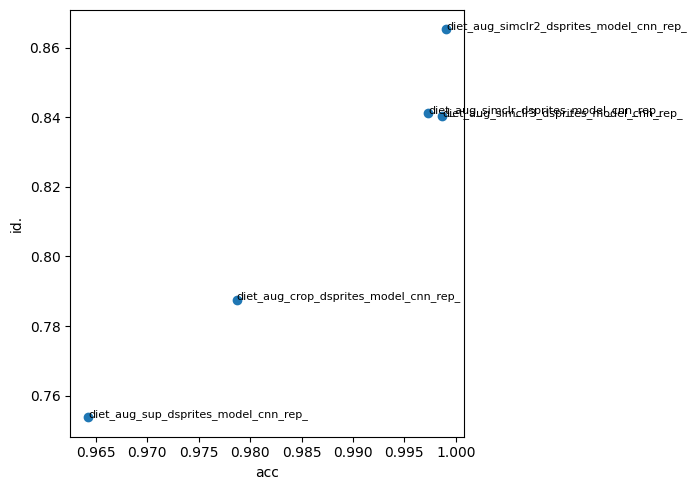

In [436]:
import matplotlib.pyplot as plt

x = wide_val["acc"]
y = wide_val["id."]

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

for exp in wide_val.index:  # index == experiment
    plt.annotate(exp, (x.loc[exp], y.loc[exp]), fontsize=8)

plt.xlabel("acc")
plt.ylabel("id.")
plt.tight_layout()
plt.show()


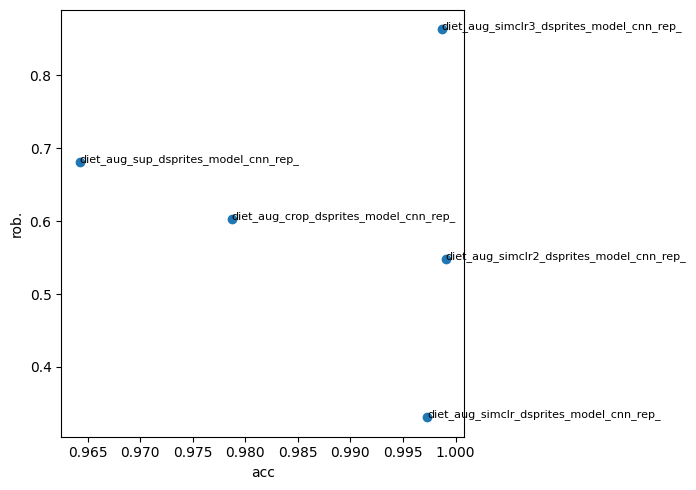

In [437]:
import matplotlib.pyplot as plt

x = wide_val["acc"]
y = wide_adv["acc"]

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

for exp in wide_val.index:  # index == experiment
    plt.annotate(exp, (x.loc[exp], y.loc[exp]), fontsize=8)

plt.xlabel("acc")
plt.ylabel("rob.")
plt.tight_layout()
plt.show()


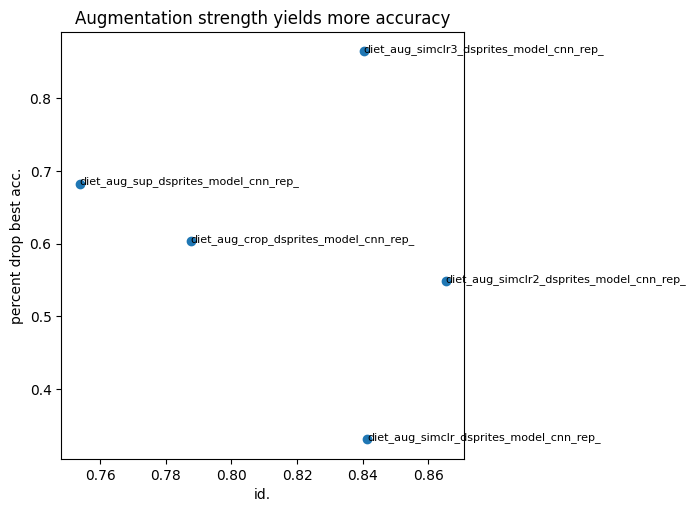

(metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.978692  0.787628  0.871054
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.999055  0.865264  0.967059
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.998689  0.840350  0.964386
 diet_aug_simclr_dsprites_model_cnn_rep_   0.997328  0.841307  0.949254
 diet_aug_sup_dsprites_model_cnn_rep_      0.964238  0.753770  0.865602,
 metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.602345  0.880988  0.824745
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.547716  0.905923  0.853227
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.863195  0.888283  0.909103
 diet_aug_simclr_dsprites_model_cnn_rep_   0.330833  0.906958  0.776321
 diet_aug_sup_dsprites_model_cnn_rep_      0.681600  0.840688  

In [471]:
import matplotlib.pyplot as plt

x = wide_val["id."]
y = 1 -( (np.max(wide_val["acc"]) - wide_adv["acc"])/  np.max(wide_val["acc"]))

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

for exp in wide_val.index:  # index == experiment
    plt.annotate(exp, (x.loc[exp], y.loc[exp]), fontsize=8)

plt.xlabel("id.")
plt.ylabel("percent drop best acc.")
plt.tight_layout()
plt.title("Augmentation strength yields more accuracy")
plt.show()
wide_val, wide_adv, y

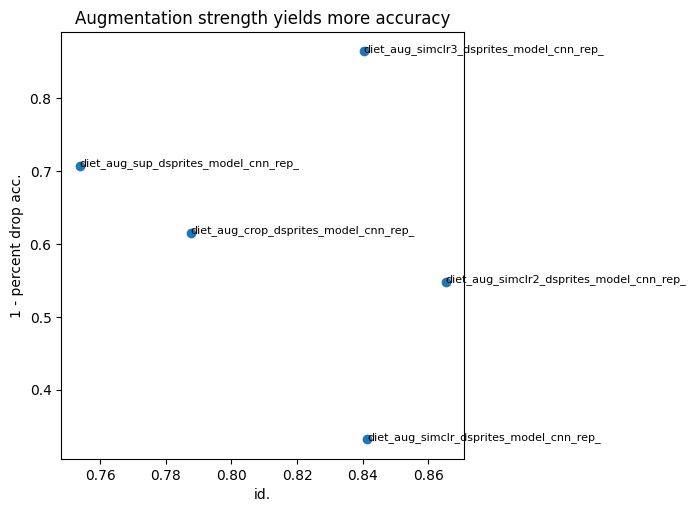

(metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.978692  0.787628  0.871054
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.999055  0.865264  0.967059
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.998689  0.840350  0.964386
 diet_aug_simclr_dsprites_model_cnn_rep_   0.997328  0.841307  0.949254
 diet_aug_sup_dsprites_model_cnn_rep_      0.964238  0.753770  0.865602,
 metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.602345  0.880988  0.824745
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.547716  0.905923  0.853227
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.863195  0.888283  0.909103
 diet_aug_simclr_dsprites_model_cnn_rep_   0.330833  0.906958  0.776321
 diet_aug_sup_dsprites_model_cnn_rep_      0.681600  0.840688  

In [469]:
import matplotlib.pyplot as plt

x = wide_val["id."]
y = 1 - ((wide_val["acc"] - wide_adv["acc"])/  wide_val["acc"])

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

for exp in wide_val.index:  # index == experiment
    plt.annotate(exp, (x.loc[exp], y.loc[exp]), fontsize=8)

plt.xlabel("id.")
plt.ylabel("1 - percent drop acc.")
plt.tight_layout()
plt.title("Augmentation strength yields more accuracy")
plt.show()
wide_val, wide_adv, y

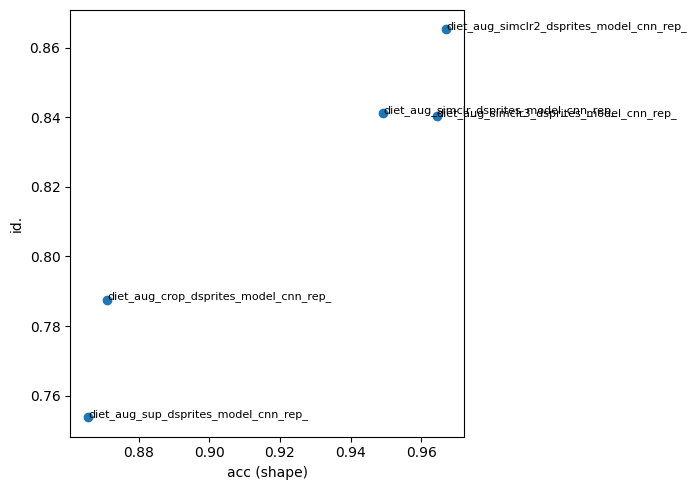

In [444]:
import matplotlib.pyplot as plt

x = wide_val["shape"]
y = wide_val["id."]

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

for exp in wide_val.index:  # index == experiment
    plt.annotate(exp, (x.loc[exp], y.loc[exp]), fontsize=8)

plt.xlabel("acc (shape)")
plt.ylabel("id.")
plt.tight_layout()
plt.show()


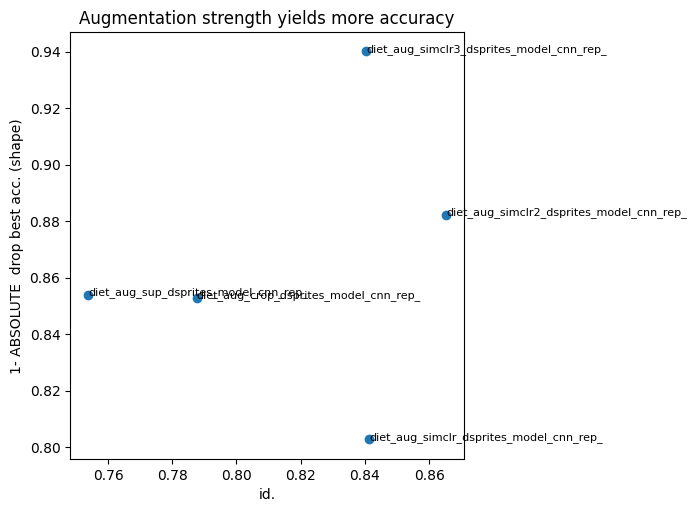

(metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.978692  0.787628  0.871054
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.999055  0.865264  0.967059
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.998689  0.840350  0.964386
 diet_aug_simclr_dsprites_model_cnn_rep_   0.997328  0.841307  0.949254
 diet_aug_sup_dsprites_model_cnn_rep_      0.964238  0.753770  0.865602,
 metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.602345  0.880988  0.824745
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.547716  0.905923  0.853227
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.863195  0.888283  0.909103
 diet_aug_simclr_dsprites_model_cnn_rep_   0.330833  0.906958  0.776321
 diet_aug_sup_dsprites_model_cnn_rep_      0.681600  0.840688  

In [472]:
import matplotlib.pyplot as plt

x = wide_val["id."]
y = 1 -( (np.max(wide_val["shape"]) - wide_adv["shape"])/  np.max(wide_val["shape"]))

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

for exp in wide_val.index:  # index == experiment
    plt.annotate(exp, (x.loc[exp], y.loc[exp]), fontsize=8)

plt.xlabel("id.")
plt.ylabel("1- ABSOLUTE  drop best acc. (shape)")
plt.tight_layout()
plt.title("Augmentation strength yields more accuracy")
plt.show()
wide_val, wide_adv, y

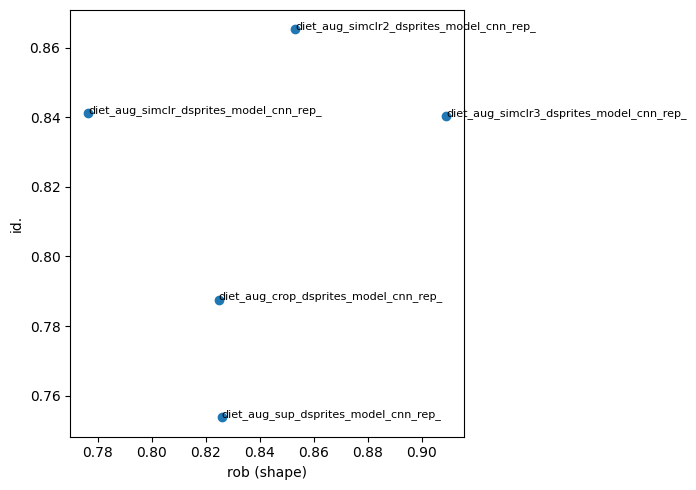

In [473]:
import matplotlib.pyplot as plt

x = wide_adv["shape"]
y = wide_val["id."]

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

for exp in wide_val.index:  # index == experiment
    plt.annotate(exp, (x.loc[exp], y.loc[exp]), fontsize=8)

plt.xlabel("rob (shape)")
plt.ylabel("id.")
plt.tight_layout()
plt.show()


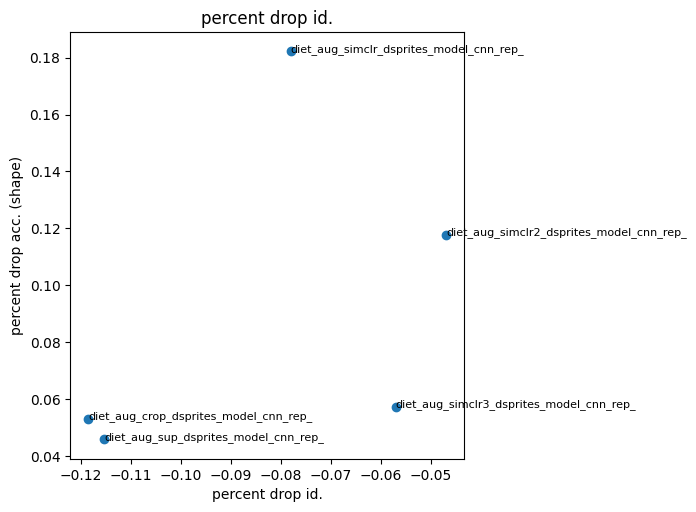

(metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.978692  0.787628  0.871054
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.999055  0.865264  0.967059
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.998689  0.840350  0.964386
 diet_aug_simclr_dsprites_model_cnn_rep_   0.997328  0.841307  0.949254
 diet_aug_sup_dsprites_model_cnn_rep_      0.964238  0.753770  0.865602,
 metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.602345  0.880988  0.824745
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.547716  0.905923  0.853227
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.863195  0.888283  0.909103
 diet_aug_simclr_dsprites_model_cnn_rep_   0.330833  0.906958  0.776321
 diet_aug_sup_dsprites_model_cnn_rep_      0.681600  0.840688  

In [474]:
import matplotlib.pyplot as plt

# x =np.max(wide_val["id."]) -( (np.max(wide_val["id."]) - wide_adv["id."])/  np.max(wide_val["id."]))
x =  (wide_val["id."] - wide_adv["id."]) / wide_val["id."]
percent_drop = lambda x, y: np.max(x) - ((np.max(x) - y) / np.max(x)) 
#y = np.max(wide_val["shape"]) -( (np.max(wide_val["shape"]) - wide_adv["shape"])/  np.max(wide_val["shape"]))
y = ( (wide_val["shape"] - wide_adv["shape"])/  wide_val["shape"])

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

for exp in wide_val.index:  # index == experiment
    plt.annotate(exp, (x.loc[exp], y.loc[exp]), fontsize=8)

plt.xlabel("percent drop id.")
plt.ylabel("percent drop acc. (shape)")
plt.tight_layout()
plt.title("percent drop id.")
plt.show()
wide_val, wide_adv, y

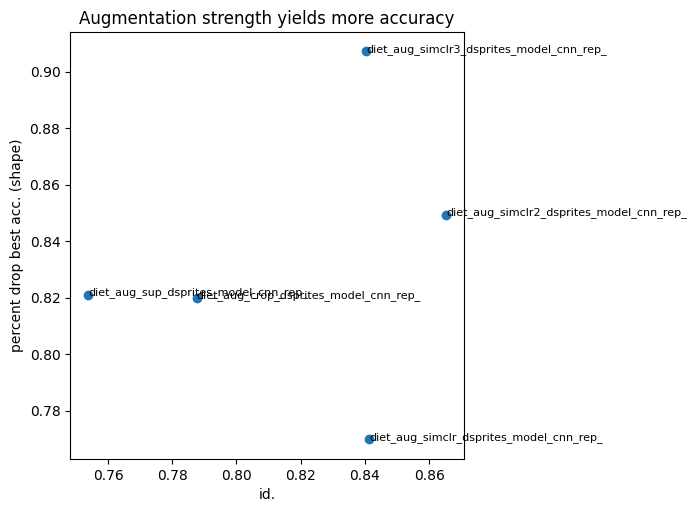

(metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.978692  0.787628  0.871054
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.999055  0.865264  0.967059
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.998689  0.840350  0.964386
 diet_aug_simclr_dsprites_model_cnn_rep_   0.997328  0.841307  0.949254
 diet_aug_sup_dsprites_model_cnn_rep_      0.964238  0.753770  0.865602,
 metric                                         acc       id.     shape
 experiment                                                            
 diet_aug_crop_dsprites_model_cnn_rep_     0.602345  0.880988  0.824745
 diet_aug_simclr2_dsprites_model_cnn_rep_  0.547716  0.905923  0.853227
 diet_aug_simclr3_dsprites_model_cnn_rep_  0.863195  0.888283  0.909103
 diet_aug_simclr_dsprites_model_cnn_rep_   0.330833  0.906958  0.776321
 diet_aug_sup_dsprites_model_cnn_rep_      0.681600  0.840688  

In [475]:
import matplotlib.pyplot as plt

x = wide_val["id."]
y = np.max(wide_val["shape"]) -( (np.max(wide_val["shape"]) - wide_adv["shape"])/  np.max(wide_val["shape"]))

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

for exp in wide_val.index:  # index == experiment
    plt.annotate(exp, (x.loc[exp], y.loc[exp]), fontsize=8)

plt.xlabel("id.")
plt.ylabel("percent drop best acc. (shape)")
plt.tight_layout()
plt.title("Augmentation strength yields more accuracy")
plt.show()
wide_val, wide_adv, y